In [1]:
import quandl
import numpy as np
from sklearn import preprocessing, model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

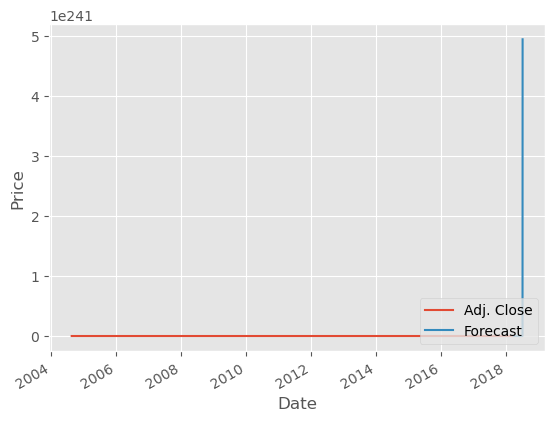

In [2]:
style.use('ggplot')

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-9999, inplace=True)
forecast_out = 1 # Forecast out a day
df['label'] = df[forecast_col].shift(-forecast_out) # shift a day

X = np.array(df.drop(['label'], 1)) # Target
X = preprocessing.scale(X) # divide by standard deviation and subtract the mean for each data point
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# Instantiate regressors
reg_close = LinearRegression(n_jobs=-1)
reg_close.fit(X_train, y_train)

reg_hl = LinearRegression(n_jobs=-1)
reg_hl.fit(X_train, y_train)

reg_pct = LinearRegression(n_jobs=-1)
reg_pct.fit(X_train, y_train)

reg_vol = LinearRegression(n_jobs=-1)
reg_vol.fit(X_train, y_train)

# Prepare variables for loop
last_close = df['Adj. Close'][-1]
last_date = df.iloc[-1].name.timestamp()
df['Forecast'] = np.nan
predictions_arr = X_lately # Last values for all targets 

for i in range(100):
    # Predict next point in time
    last_close_prediction = reg_close.predict(predictions_arr)
    last_hl_prediction = reg_hl.predict(predictions_arr)
    last_pct_prediction = reg_pct.predict(predictions_arr)
    last_vol_prediction = reg_vol.predict(predictions_arr)

    # Create np.Array of current predictions to serve as input for future predictions
    predictions_arr = np.array((last_close_prediction, last_hl_prediction, last_pct_prediction, last_vol_prediction)).T
    next_date = datetime.datetime.fromtimestamp(last_date)
    last_date += 86400

    # Outputs data into DataFrame to enable plotting
    df.loc[next_date] = [np.nan, np.nan, np.nan, np.nan, np.nan, float(last_close_prediction)]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [3]:
predictions_arr

array([[4.94505318e+241, 4.94505318e+241, 4.94505318e+241,
        4.94505318e+241]])

In [38]:
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,54.322689,NaN
2004-08-20,54.322689,7.921706,7.227007,22834300.0,54.869377,NaN
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,52.597363,NaN
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,53.164113,NaN
2004-08-25,53.164113,3.886792,1.183658,9188600.0,54.122070,NaN
...,...,...,...,...,...,...
2018-06-29,NaN,NaN,NaN,NaN,NaN,1.234292e+232
2018-06-30,NaN,NaN,NaN,NaN,NaN,3.183203e+234
2018-07-01,NaN,NaN,NaN,NaN,NaN,8.209389e+236


In [39]:
df.tail(100)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2017-11-03 00:00:00,1049.99,1.239059,0.694318,1370874.0,1042.68,NaN
2017-11-06 00:00:00,1042.68,1.015652,-0.611953,897897.0,1052.39,NaN
2017-11-07 00:00:00,1052.39,0.989177,0.261039,1254965.0,1047.72,NaN
2017-11-09 00:00:00,1047.72,1.434544,-0.026718,1776722.0,1044.15,NaN
2017-11-10 00:00:00,1044.15,0.518125,0.026823,955500.0,1041.20,NaN
...,...,...,...,...,...,...
2018-03-26 00:00:00,NaN,NaN,NaN,NaN,NaN,1.006180e+03
2018-03-26 00:00:01,NaN,NaN,NaN,NaN,NaN,2.593379e+05
2018-03-26 00:00:02,NaN,NaN,NaN,NaN,NaN,6.673796e+07
